# **Task 1: Data Exploration and Visualization**

In this notebook, we will explore and visualize the **Customers**, **Products**, and **Transactions** datasets to gain insights into the customer distribution, product categories, sales trends, and spending behaviors.

---


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")


### **Step 1: Load the Datasets**

We load the **Customers**, **Products**, and **Transactions** datasets and inspect their basic structure.

---


In [4]:

customers = pd.read_csv(r'Customers.csv')
products = pd.read_csv(r'Products.csv')
transactions = pd.read_csv(r'Transactions.csv')


print("Customers Dataset:")
print(customers.info(), "\n")

print("Products Dataset:")
print(products.info(), "\n")

print("Transactions Dataset:")
print(transactions.info(), "\n")

# Display the first few rows of each dataset
print("Customers Dataset Preview:")
display(customers.head())

print("Products Dataset Preview:")
display(products.head())

print("Transactions Dataset Preview:")
display(transactions.head())


Customers Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None 

Products Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.2+ KB
None 

Transactions Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column        

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


Products Dataset Preview:


,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


Transactions Dataset Preview:


,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


### **Step 2: Check for Missing Values**

We check for any missing values across the datasets, which will be important for data cleaning.

---


In [5]:

print("Missing Values in Customers Dataset:")
print(customers.isnull().sum(), "\n")

print("Missing Values in Products Dataset:")
print(products.isnull().sum(), "\n")

print("Missing Values in Transactions Dataset:")
print(transactions.isnull().sum(), "\n")


Missing Values in Customers Dataset:
CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64 

Missing Values in Products Dataset:
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64 

Missing Values in Transactions Dataset:
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64 



### **Step 3: Describe Numerical Data**

Here, we describe the basic statistics (e.g., mean, median, standard deviation) for the numerical columns in each dataset.

---


In [6]:


print("Basic Statistics - Customers:")
print(customers.describe(), "\n")

print("Basic Statistics - Products:")
print(products.describe(), "\n")

print("Basic Statistics - Transactions:")
print(transactions.describe(), "\n")


Basic Statistics - Customers:
       CustomerID      CustomerName         Region  SignupDate
count         200               200            200         200
unique        200               200              4         179
top         C0001  Lawrence Carroll  South America  2022-04-16
freq            1                 1             59           3 

Basic Statistics - Products:
            Price
count  100.000000
mean   267.551700
std    143.219383
min     16.080000
25%    147.767500
50%    292.875000
75%    397.090000
max    497.760000 

Basic Statistics - Transactions:
          Quantity   TotalValue       Price
count  1000.000000  1000.000000  1000.00000
mean      2.537000   689.995560   272.55407
std       1.117981   493.144478   140.73639
min       1.000000    16.080000    16.08000
25%       2.000000   295.295000   147.95000
50%       3.000000   588.880000   299.93000
75%       4.000000  1011.660000   404.40000
max       4.000000  1991.040000   497.76000 



### **Step 4: Merge Datasets**

We merge the **Customers**, **Transactions**, and **Products** datasets to create a comprehensive dataset that combines all the relevant customer transaction information.

---


In [7]:


# Merge Customers with Transactions on 'CustomerID'
customer_transactions = pd.merge(transactions, customers, on='CustomerID', how='left')

# Merge the resulting dataset with Products on 'ProductID'
merged_data = pd.merge(customer_transactions, products, on='ProductID', how='left')

# Preview the merged dataset
print("Merged Dataset Preview:")
display(merged_data.head())


Merged Dataset Preview:


,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,CustomerName,Region,SignupDate,ProductName,Category,Price_y
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics,300.68


### **Step 5: Analyze Customer Distribution by Region**

We analyze the distribution of customers across different regions and visualize the results using a bar plot.

---


C:\Users\Wahe Guru\AppData\Local\Temp\ipykernel_17460\3650179237.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_distribution.index, y=region_distribution.values, palette='viridis')


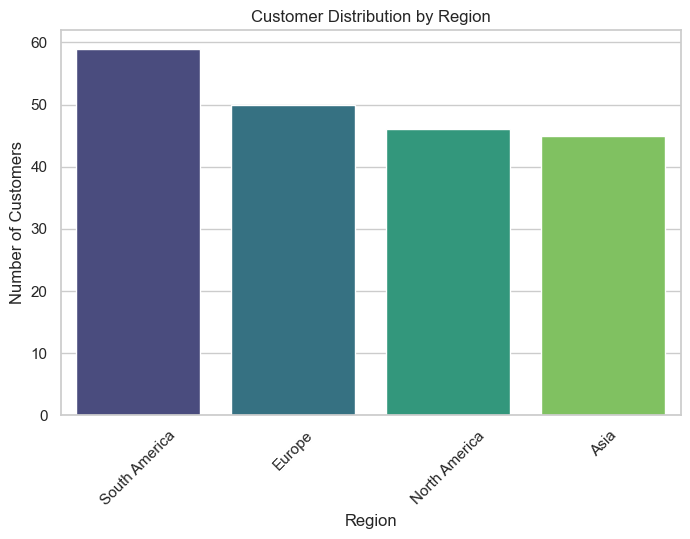

In [8]:
# Count customers in each region
region_distribution = customers['Region'].value_counts()

# Plot the customer distribution by region
plt.figure(figsize=(8, 5))
sns.barplot(x=region_distribution.index, y=region_distribution.values, palette='viridis')
plt.title('Customer Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.show()

### **Step 6: Analyze Sales by Product Category**

We analyze the total sales for each product category and visualize the results in a bar plot.

---


C:\Users\Wahe Guru\AppData\Local\Temp\ipykernel_17460\1102281570.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_sales.index, y=category_sales.values, palette='coolwarm')


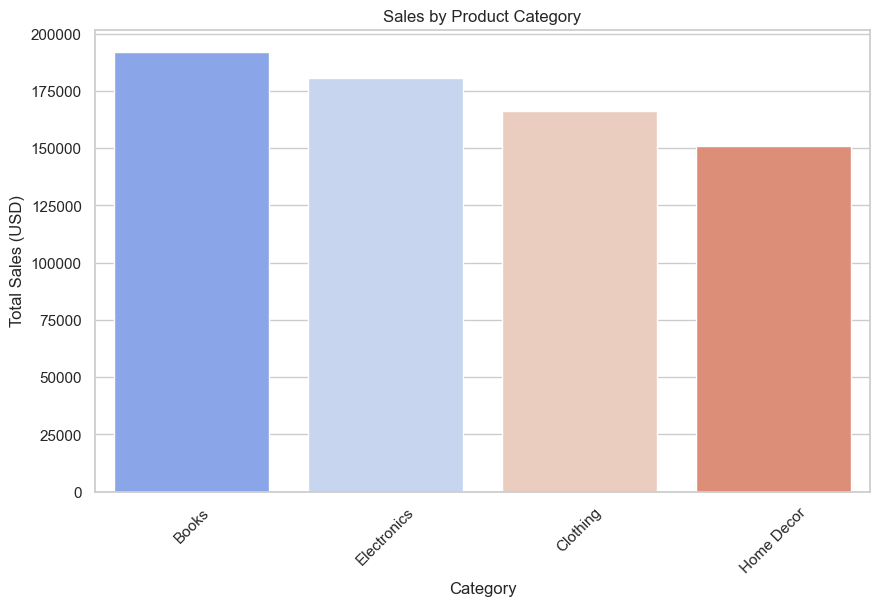

In [9]:

# Group by category and calculate total sales per category
category_sales = merged_data.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)

# Plot the total sales by product category
plt.figure(figsize=(10, 6))
sns.barplot(x=category_sales.index, y=category_sales.values, palette='coolwarm')
plt.title('Sales by Product Category')
plt.xlabel('Category')
plt.ylabel('Total Sales (USD)')
plt.xticks(rotation=45)
plt.show()


### **Step 7: Analyze Monthly Sales Trend**

We analyze the sales trend over time by grouping the data by month and plotting the total sales for each month.

---


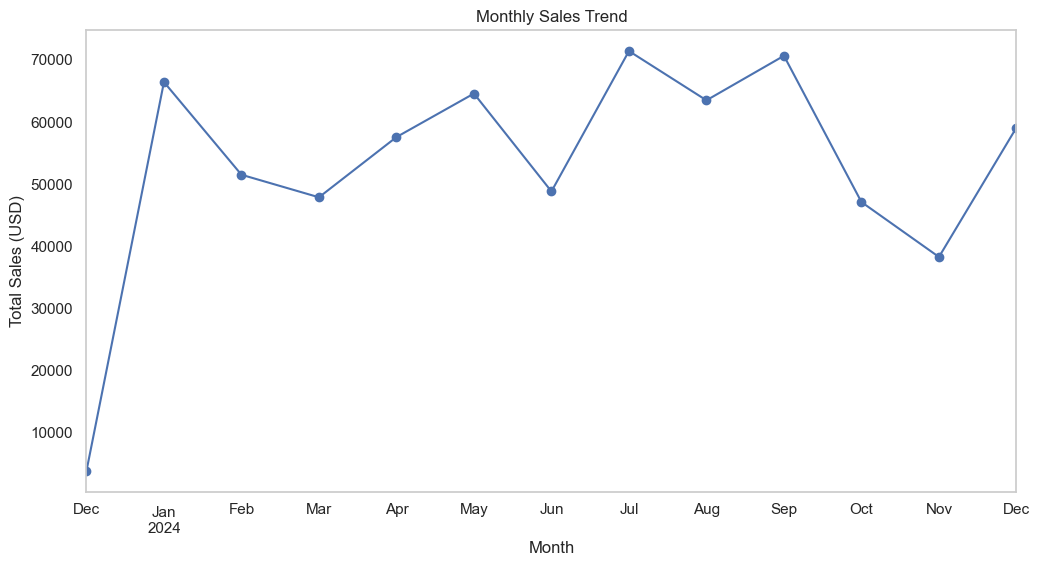

In [10]:


# Convert 'TransactionDate' to datetime format
merged_data['TransactionDate'] = pd.to_datetime(merged_data['TransactionDate'])

# Extract Year-Month from the TransactionDate column
merged_data['YearMonth'] = merged_data['TransactionDate'].dt.to_period('M')

# Group data by YearMonth and calculate total sales per month
monthly_sales = merged_data.groupby('YearMonth')['TotalValue'].sum()

# Plot the monthly sales trend
plt.figure(figsize=(12, 6))
monthly_sales.plot(marker='o', color='b')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales (USD)')
plt.grid()
plt.show()


### **Step 8: Identify Top 10 High-Spending Customers**

We identify the top 10 customers based on their total spending and visualize their spending behavior.

---


C:\Users\Wahe Guru\AppData\Local\Temp\ipykernel_17460\2235658365.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_customers.index, y=top_customers.values, palette='magma')


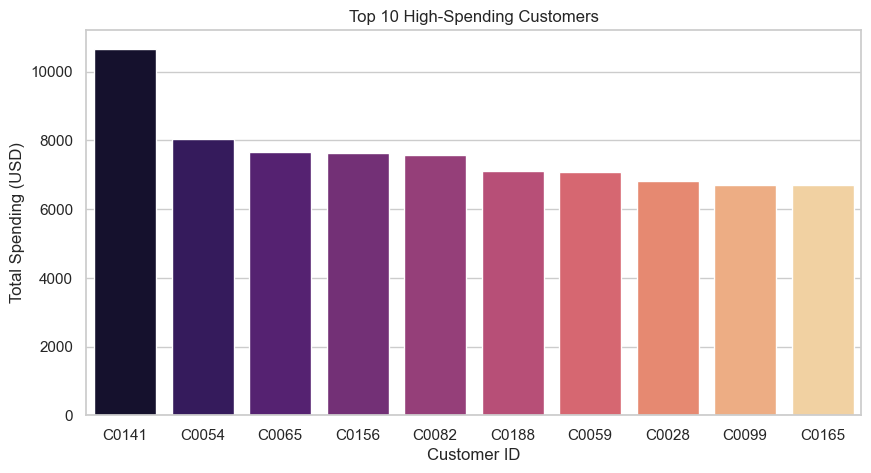

In [11]:
# Group by 'CustomerID' and calculate total spending per customer
top_customers = merged_data.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False).head(10)

# Plot the top 10 high-spending customers
plt.figure(figsize=(10, 5))
sns.barplot(x=top_customers.index, y=top_customers.values, palette='magma')
plt.title('Top 10 High-Spending Customers')
plt.xlabel('Customer ID')
plt.ylabel('Total Spending (USD)')
plt.show()


### **Step 9: Analyze Price Distribution of Products**

We visualize the price distribution of products to understand the pricing structure.

---


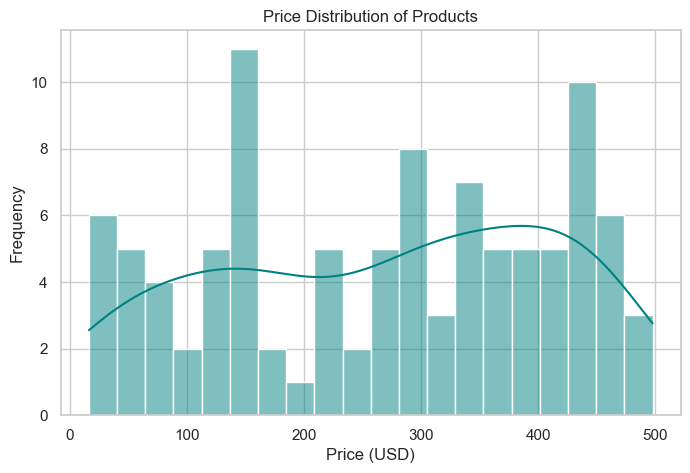

In [12]:
plt.figure(figsize=(8, 5))
sns.histplot(products['Price'], bins=20, kde=True, color='teal')
plt.title('Price Distribution of Products')
plt.xlabel('Price (USD)')
plt.ylabel('Frequency')
plt.show()